# Imports

In [35]:
import os
import sys
sys.path.append("../")

import pandas as pd
pd.set_option('display.max_columns', 10000)

#Audio Processing Libraries
import librosa
from scipy import signal
#For Playing Audio
import IPython.display as ipd
#Array Processing
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt


[GTZAN](http://opihi.cs.uvic.ca/sound/genres.tar.gz)

+ Description:
L'ensemble de données se compose de 1000 pistes audio d'une durée de 30 secondes. 

Il contient 10 genres, chacun représenté par 100 pistes. 

Les pistes sont toutes des fichiers audio mono 16 bits à 22050 Hz au format .wav.

Les genres sont :

+ blues
+ classique
+ country
+ disco
+ hip hop
+ jazz
+ metal
+ pop
+ reggae
+ rock

# Préparation des données

Le sample rate (taux d'échantillonage) correspond à la moyenne d'échantillons capturés en 1 seconde. 

Afin de constituer les données d'entrainements, chaque piste audio est découpée en piste de 5 secondes flottantes (de 0 à 5 secondes, de 1 à 6 secondes ...).

Chaque piste audio de 5 secondes correspond à un array de taille [sample rate * 5]

In [36]:
from pathlib import Path

def prepare_data(samples, num_of_samples, sample_rate, f_path, genre):
  # extract filename from the file path
  filename = Path(f_path).stem.strip('.wav')
  data = []
  data_row ={}
  i = 0
  # divide data into chunks with a step equal to the sample rate
  for offset in range(0, len(samples), sample_rate):
    start = offset
    end   = offset + num_of_samples
    chunk = samples[start:end]
    if(len(chunk)==num_of_samples):
      data_row = {'filename': f"{filename}_{i}", 'chunk': chunk, 'sample_rate': sample_rate, 'genre': genre}
      data.append(data_row)
      i += 1
  return data

In [37]:
from scipy.io import wavfile

df = pd.DataFrame()

genres_dir = "../data/01/genres"

genres = os.listdir(genres_dir)
# loop throught genres
for genre in genres:
    files = os.listdir(os.path.join(genres_dir, genre))
    # loop throught files
    for f in files:
        f_path = os.path.join(genres_dir, genre, f)
        samplerate, data = wavfile.read(f_path)
        chunks = prepare_data(data, samplerate*5, samplerate, f, genre)
        df = df.append(chunks)

df = df.reset_index(drop=True)
df.shape

(25991, 4)

In [38]:
df.sample(2)

,filename,chunk,sample_rate,genre
10028,country.00057_23,"[-3887, -3517, -1485, 413, 12, -476, 341, 329,...",22050,country
10224,country.00050_11,"[-6165, -5136, -4100, -3903, -3692, -4134, -45...",22050,country


In [39]:
df.genre.value_counts()


pop          2600
blues        2600
jazz         2600
reggae       2600
metal        2600
rock         2599
disco        2599
classical    2598
hiphop       2598
country      2597
Name: genre, dtype: int64

In [48]:
metal_preview = df.iat[15412, 1]  # chunk of metal track
disco_preview = df.iat[4226, 1]   # chunk of disco track

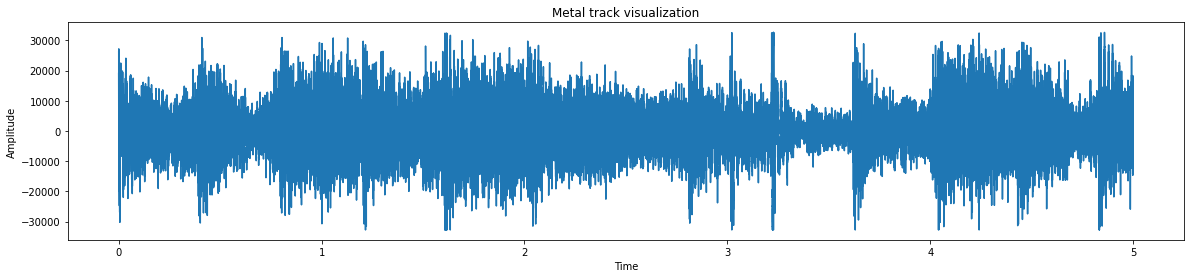

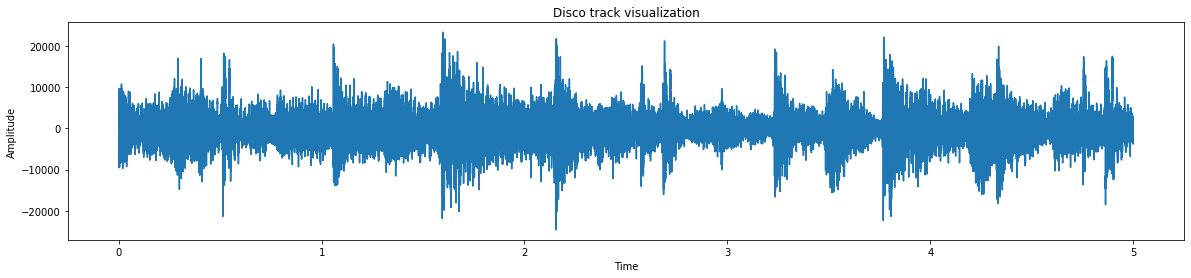

In [41]:
from scipy.io import wavfile
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
plt.plot(np.linspace(0, 5, num=len(metal_preview)), metal_preview)
plt.title('Metal track visualization')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.figure(figsize=(20, 4))
plt.plot(np.linspace(0, 5, num=len(disco_preview)), disco_preview)
plt.title('Disco track visualization')
plt.xlabel('Time')
plt.ylabel('Amplitude')
_ = plt.show()



In [42]:
sample_rate = 22050
metal_preview_path = "../data/chunk_audio_preview/metal_preview.wav"
disco_preview_path = "../data/chunk_audio_preview/disco_preview.wav"

metal_audio = wavfile.write(metal_preview_path, sample_rate, metal_preview)
disco_audio = wavfile.write(disco_preview_path, sample_rate, disco_preview)


In [49]:
from playsound import playsound

playsound(metal_preview_path)
playsound(disco_preview_path)


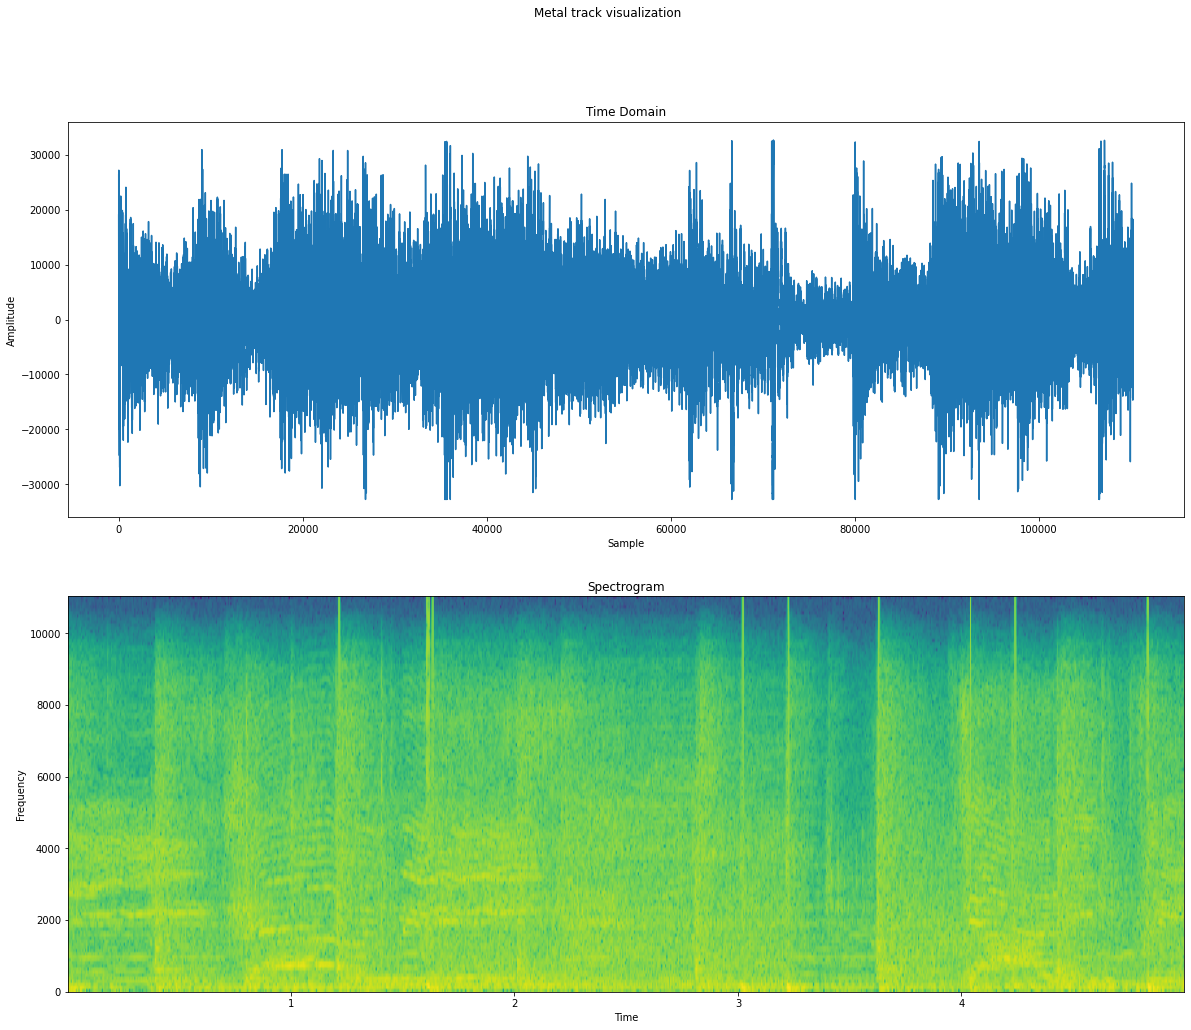

In [44]:
sample_rate, samples = wavfile.read(metal_preview_path)

plt.figure(figsize=(20,16))
plt.suptitle('Metal track visualization')

plt.subplot(211)
plt.title('Time Domain')
plt.plot(samples)
plt.xlabel('Sample')
plt.ylabel('Amplitude')


plt.subplot(212)
plt.title("Spectrogram")
plt.specgram(samples, Fs=sample_rate)
plt.xlabel('Time')
plt.ylabel('Frequency')

_ = plt.show()


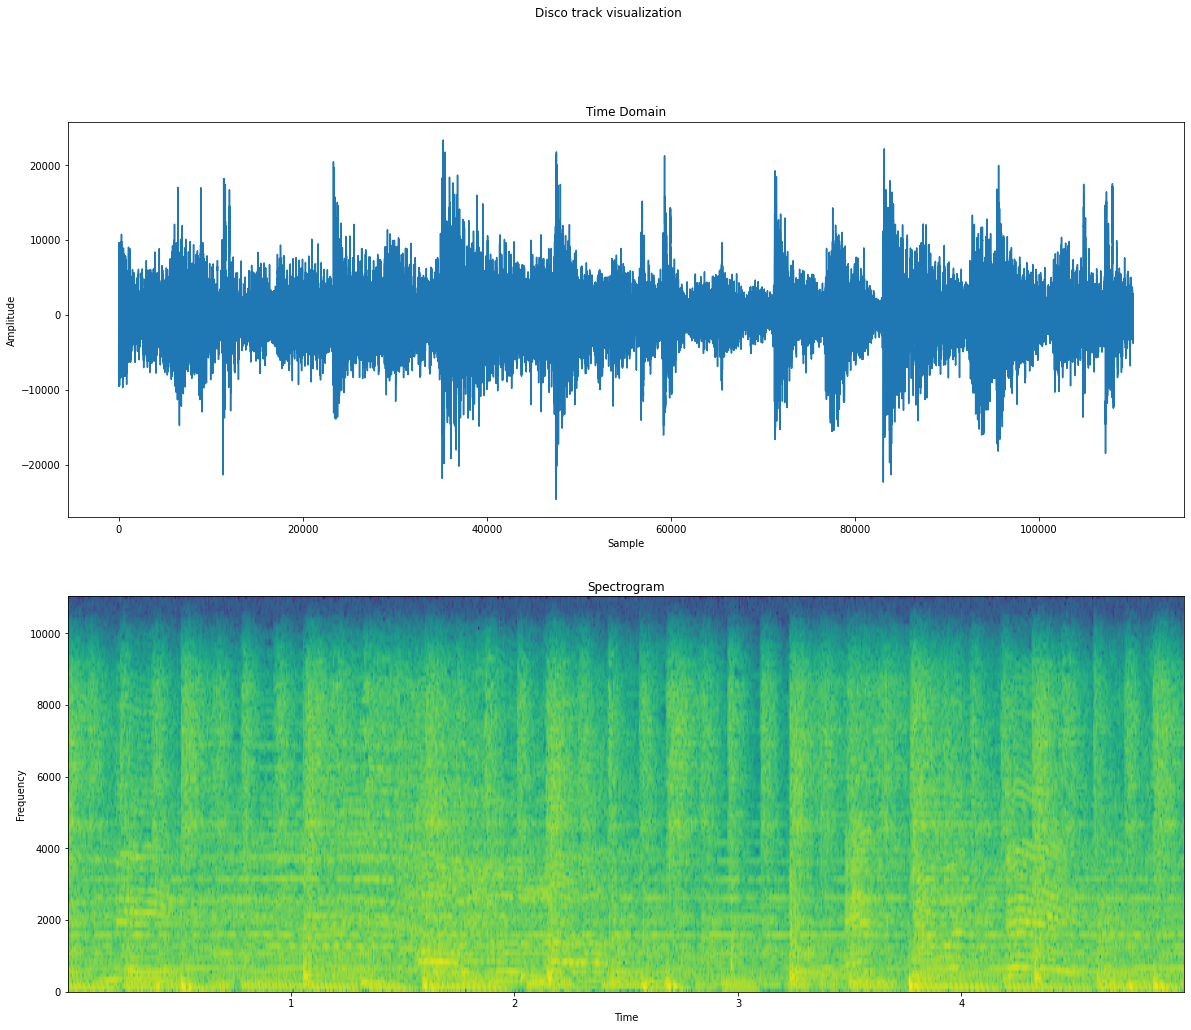

In [45]:
sample_rate, samples = wavfile.read(disco_preview_path)

plt.figure(figsize=(20, 16))
plt.suptitle('Disco track visualization')

plt.subplot(211)
plt.title('Time Domain')
plt.plot(samples)
plt.xlabel('Sample')
plt.ylabel('Amplitude')


plt.subplot(212)
plt.title("Spectrogram")
plt.specgram(samples, Fs=sample_rate)
plt.xlabel('Time')
plt.ylabel('Frequency')

_ = plt.show()


In [46]:
df.to_csv('../data/02/chunks.csv', index=False)

Le jeu d'entrainement est maintenant constitué de 25991 pistes audio (environ 2600 par genre musical)